# Devesh Pandey
GRIP@TSF Task 1 :
Prediction using Supervised ML


In [13]:
# Importing all required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [14]:
#Import the dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


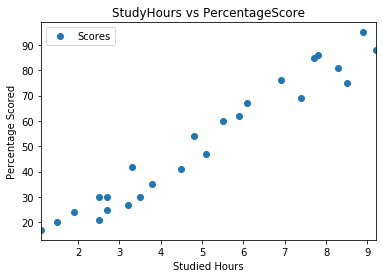

In [15]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('StudyHours vs PercentageScore')  
plt.xlabel('Studied Hours')  
plt.ylabel('Percentage Scored')  
plt.show()

# Preparing the data
Splitting the data into training set and testing set.

In [16]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test= train_test_split(X, Y, test_size = 0.3, random_state =0)

In [17]:
print(X_train)
print("")
print(Y_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]

[76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [18]:
print(x_test)
print("")
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]

[20 27 69 30 62 35 24 86]


# Training the Algorithm
Traning the Algorithm using training set

In [19]:
#Training on Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training complete.")

Training complete.


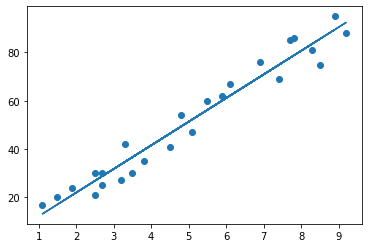

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Prediction

In [21]:
print('Testing data - In Hours :',x_test) # Testing data - In Hours

# Predicting the scores
y_predicted = regressor.predict(x_test)
print('Predicted marks :',y_predicted)

Testing data - In Hours : [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
Predicted marks : [17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [23]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("If a student studies for {}".format(hours),"hours per day,")
print("then he may score",round(own_pred[0]),"marks.")

If a student studies for 9.25 hours per day,
then he may score 93.0 marks.


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predicted)) 

Mean Absolute Error: 4.419727808027652
